# **Ikarus Model Training**
In previous notebook I had analysed the dataset provided. the requirement is to build a recommendation model for the web application which accepts prompts and reccomends furniture stuff according to that.

> SETUP Import Libraries and Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving intern_data_ikarus.csv to intern_data_ikarus.csv


In [3]:
df = pd.read_csv("intern_data_ikarus.csv")

In [4]:
display(df.head(15))

,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a
5,"LOVMOR 30'' Bathroom Vanity Sink Base Cabine, ...",LOVMOR,Our versatile bathroom sink base cabinet is pe...,NaN,"['Home & Kitchen', 'Furniture', 'Bathroom Furn...",['https://m.media-amazon.com/images/I/41zMuj2w...,NaN,"21""D x 30""W x 34.5""H",Vietnam,Wood,Cameo Scotch,20da3703-26f1-53e5-aa0b-a8104527d1bb
6,Folews Bathroom Organizer Over The Toilet Stor...,Folews Store,NaN,$63.99,"['Home & Kitchen', 'Furniture', 'Bathroom Furn...",['https://m.media-amazon.com/images/I/41ixgM73...,Folews,"12.6""D x 25.2""W x 68.5""H",China,NaN,NaN,aba4138e-6401-52ca-a099-02e30b638db4
7,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
8,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
9,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8


> Given that its a text-heavy dataset, I combine all relevant text into one column ["text"]

In [5]:
df["text"] = (
    df["title"].fillna("") + " " +
    df["description"].fillna("") + " " +
    df["categories"].fillna("")
)

# Drop empty rows
df = df[df["text"].str.strip() != ""]
print("Final data size:", len(df))

Final data size: 312


In [6]:
df['text']

,text
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye..."
1,"subrtex Leather ding Room, Dining Chairs Set o..."
2,Plant Repotting Mat MUYETOL Waterproof Transpl...
3,"Pickleball Doormat, Welcome Doormat Absorbent ..."
4,JOIN IRON Foldable TV Trays for Eating Set of ...
...,...
307,Lexicon Victoria Saddle Wood Bar Stools (Set o...
308,ANZORG Behind Door Hanging Kids Shoes Organize...
309,Pipishell Full-Motion TV Wall Mount for Most 3...
310,Noori Rug Home - Lux Collection Modern Ava Rou...


From the ['text'] columns we generate embeddings using pretrained model "all-MiniLM"

In [7]:
from sentence_transformers import SentenceTransformer
import torch

# Load pretrained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
product_embeddings = model.encode(df["text"].tolist(), convert_to_tensor=True, show_progress_bar=True)

# Save for reuse
torch.save(product_embeddings, "product_embeddings.pt")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Lets have some users query example. We generate embeddings from prompt too and use cosine similarity to find closest one to the prompt. Here I selected top 5 similar items.

In [8]:
from sentence_transformers import util

# Example user query
query = "brown doormat"
query_emb = model.encode(query, convert_to_tensor=True)

# Compute similarity
cosine_scores = util.cos_sim(query_emb, product_embeddings)[0]

# Get top 5 results
top_k = 5
top_results = torch.topk(cosine_scores, k=top_k)

# Show results
for idx in top_results[1]:
    item = df.iloc[idx.item()]
    print(f"🔹 {item['title']} ({item['brand']}) - {item['price']}")
    print(f"   {str(item['description'])[:120]}...\n")


🔹 Pickleball Doormat, Welcome Doormat Absorbent Non-Slip Floor Mat Bathroom Mat 16x24 (VEWETOL) - $13.99
   The decorative doormat features a subtle textured surface that absorbs moisture and helps remove dirt and debris from yo...

🔹 Pickleball Doormat, Welcome Doormat Absorbent Non-Slip Floor Mat Bathroom Mat 16x24 (VEWETOL) - $13.99
   The decorative doormat features a subtle textured surface that absorbs moisture and helps remove dirt and debris from yo...

🔹 Funny Welcome Doormat for Entryway Front Porch Mat Welcome Madafakas Bulldog with Gun Doormat for Front Door Decor Personalized Kitchen Mat with Anti-Slip Rubber Back Novelty Gift Mat(23.7 X 15.9 in) (GXFC ZHAO Store) - $25.02
   "★Home front porch Decor Doormat with |ANTI-SLIP|Rubber Back. Colourful print on Non-woven Polyester fiber,【safe for kid...

🔹 Caroline's Treasures CK3435MAT Bichon Frise Doormat 18x27 Front Door Mat Indoor Outdoor Rugs for Entryway, Non Slip Washable Low Pile, 18H X 27W (Caroline's Treasures Store) -

# Visualisations
I have used TSNE for dimensionality reductions, PCA will also do the job.
Then using KNN classifies we get a graph showing clusters of similar embeddings

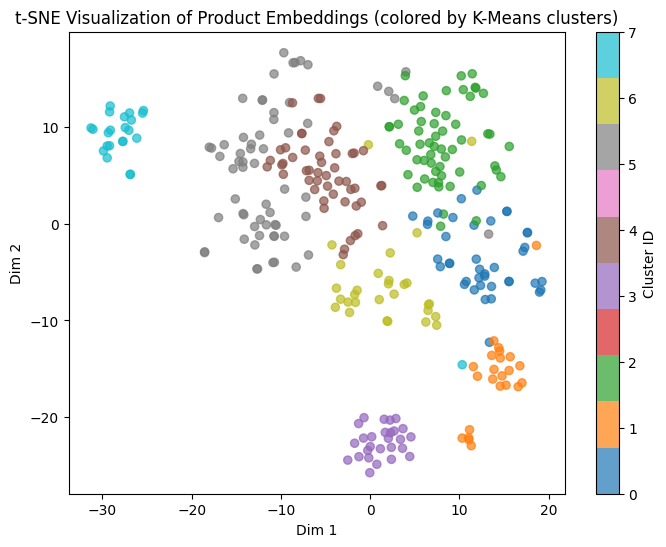

In [9]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Run KMeans on full embeddings (not reduced)
kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(product_embeddings.cpu())

# Step 2: Reduce to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced = tsne.fit_transform(product_embeddings.cpu()[:1000])  # sample 1000 for speed
label_sample = labels[:1000]

# Step 3: Plot with colors per cluster
plt.figure(figsize=(8,6))
scatter = plt.scatter(reduced[:,0], reduced[:,1],
                      c=label_sample, cmap='tab10', alpha=0.7, s=35)
plt.title("t-SNE Visualization of Product Embeddings (colored by K-Means clusters)")
plt.xlabel("Dim 1"); plt.ylabel("Dim 2")
plt.colorbar(scatter, label='Cluster ID')
plt.show()


> Lets see what each cluster looks like

In [10]:
import numpy as np
df["cluster"] = labels
for i in np.unique(labels):
    subset = df[df["cluster"] == i]
    print(f"\nCluster {i}:")
    print(subset["categories"].value_counts().head(2))



Cluster 0:
categories
['Home & Kitchen', 'Storage & Organization', 'Clothing & Closet Storage', 'Shoe Organizers', 'Free Standing Shoe Racks']    6
['Home & Kitchen', 'Furniture', 'Bathroom Furniture', 'Over-the-Toilet Storage']                                            4
Name: count, dtype: int64

Cluster 1:
categories
['Tools & Home Improvement', 'Hardware', 'Bathroom Hardware', 'Towel Bars']     10
['Tools & Home Improvement', 'Hardware', 'Bathroom Hardware', 'Towel Rings']     6
Name: count, dtype: int64

Cluster 2:
categories
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Tables', 'End Tables']    21
['Home & Kitchen', 'Furniture', 'Home Office Furniture', 'Home Office Desks']        7
Name: count, dtype: int64

Cluster 3:
categories
['Home & Kitchen', 'Home Décor Products', 'Mirrors', 'Wall-Mounted Mirrors']      21
['Beauty & Personal Care', 'Tools & Accessories', 'Mirrors', 'Makeup Mirrors']     3
Name: count, dtype: int64

Cluster 4:
categories
['Home & Kitchen', 

### **Generic words like Home, Kitchen, Furniture etc have a widespread cluster whereas specific terms have concentrated  distribution**



---



---



# **Generative AI Description**


Use of Gen AI model to create a better description for the user. If in future we use that description to generate embeddings, it may inturn improve models overall capability.

## Set up gemini api

Add code to install the necessary library and set up the Gemini API key.


In [11]:
!pip install -q -U google-generativeai

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.
In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [12]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

Before you can make any API calls, you need to initialize the Generative Model.

Check for avaiable models which can be use for generating content;

In [15]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/learnlm-2.0-flash-experimental
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models

> I have chosen the latest model for this task which is "gemini-2.5-flash"

In [13]:
# Initialize the Gemini API
gemini_model = genai.GenerativeModel('models/gemini-2.5-flash')

## Function to Generate Descriptions

In [23]:
def generate_description(title, description):
    """Generates a professional product description using the Gemini model.

    Args:
        title: The product title.
        description: The existing product description (can be None or empty).

    Returns:
        Only the description of the object. No chit chats or other stuff.
    """
    prompt = f"Generate only a user-friendly and professional product description, under 100 words, based on the following information:\n\nTitle: {title}\nExisting Description: {description}\n\nGenerated Description:"
    try:
        response = gemini_model.generate_content(prompt)
        # Simple truncation to try and keep it under 100 words, although the prompt should help
        generated_text = response.text
        words = generated_text.split()
        if len(words) > 100:
            generated_text = " ".join(words[:100]) + "..."
        return generated_text
    except Exception as e:
        print(f"Error generating description: {e}")
        return "Error generating description."

> Testing for first entry in dataset

In [24]:

test_descriptions = df.head(1).apply(lambda row: generate_description(row['title'], row['description']), axis=1)

# Display the original title, description, and the generated description for the test rows
display(df[['title', 'description']].head(1))
print("\nGenerated Descriptions for the first 5 rows:")
display(test_descriptions)

,title,description
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...","multiple shoes, coats, hats, and other items E..."



Generated Descriptions for the first 5 rows:


,0
0,Organize your space with the GOYMFK Free Stand...


### Below is the entrire description we got.

In [25]:
test_descriptions[0]

"Organize your space with the GOYMFK Free Standing Shoe Rack. This multi-layer metal unit efficiently stores shoes, coats, hats, and more, thanks to its 8 double hooks. Designed for versatility, it's perfect for your living room, bathroom, or hallway. Enjoy easy assembly with all hardware and instructions included, making decluttering simple and stylish."

This marks a succesful api test and we got exact output that we needed.

# Summary

In this notebook, I have performed the following steps:

1.  **Data Loading and Preparation**: You loaded product data from a CSV file and created a combined text field (`text`) from the 'title', 'description', and 'categories' columns. This combined text is crucial for generating meaningful embeddings.
2.  **Embeddings Generation**: You used the `sentence-transformers` library to generate vector embeddings for each product's text data. These embeddings capture the semantic meaning of the product descriptions, allowing for similarity comparisons and clustering.
3.  **Clustering and Visualization**: You applied K-Means clustering to the product embeddings to group similar products together. You then used t-SNE to reduce the dimensionality of the embeddings for visualization, allowing you to see how the clusters are distributed in a 2D space. You also inspected the categories within each cluster to understand the nature of the groupings.
4.  **Gemini API Setup**: You set up the Google Gemini API, which will be used for generating improved product descriptions.
5.  **Description Generation Function**: You created a function `generate_description` that utilizes the Gemini model to generate more user-friendly and professional product descriptions based on the product's title and existing description. You also refined this function to ensure the output is concise and free of extra conversational text.

These steps are helping you to:

*   **Understand your product data**: By generating embeddings and clustering, you can identify groups of similar products, which can be useful for various tasks like product recommendations or targeted marketing.
*   **Improve product descriptions**: The `generate_description` function allows you to automatically generate high-quality descriptions, which can enhance the user experience and potentially improve searchability and sales.
*   **Prepare for further analysis**: The generated embeddings and improved descriptions can be used for more advanced tasks, such as building a recommendation system or performing detailed product analysis.